# ETL Project

The following project focuses on the amount of people with issued medical marijuana cards in various California Counties.

The raw dataset was obtained from kaggle. The data used ranges from the years 2004-2017.

After conducting a explorative analysis, the final clean data set was added to a sqlite db.

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("CountyCardCount.xlsx")
df.head()

,California Medical Marijuana Identification Card Data by County and Fiscal Year,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,County,Cards Issued FY 2004-5,Cards Issued FY 2005-6,Cards Issued FY 2006-7,Cards Issued FY 2007-8,Cards Issued FY 2008-9,Cards Issued FY 2009-10,Cards Issued FY 2010-11,Cards Issued FY 2011-12,Cards Issued FY 2012-13,Cards Issued FY 2013-14,Cards Issued FY 2014-15,Cards Issued FY 2015-16,Cards Issued FY 2016-17,Total All Fiscal Years
1,Alameda,NaN,NaN,1475,657,652,611,439,279,242,216,242,214,62,5089
2,Alpine,NaN,NaN,NaN,NaN,0,2,0,0,0,0,0,0,0,2
3,Amador,4,23,32,15,16,16,6,3,2,3,10,13,4,147
4,Butte,NaN,NaN,5,16,33,48,33,23,21,18,16,18,4,235


In [3]:
#Set the column labels to equal the values in the 2nd row (index location 1):
df.columns = df.iloc[0]

In [4]:
# now drop the 2nd row 
df = df.reindex(df.index.drop(0))
df

,County,Cards Issued FY 2004-5,Cards Issued FY 2005-6,Cards Issued FY 2006-7,Cards Issued FY 2007-8,Cards Issued FY 2008-9,Cards Issued FY 2009-10,Cards Issued FY 2010-11,Cards Issued FY 2011-12,Cards Issued FY 2012-13,Cards Issued FY 2013-14,Cards Issued FY 2014-15,Cards Issued FY 2015-16,Cards Issued FY 2016-17,Total All Fiscal Years
1,Alameda,NaN,NaN,1475,657,652,611,439,279,242,216,242,214,62,5089
2,Alpine,NaN,NaN,NaN,NaN,0,2,0,0,0,0,0,0,0,2
3,Amador,4,23,32,15,16,16,6,3,2,3,10,13,4,147
4,Butte,NaN,NaN,5,16,33,48,33,23,21,18,16,18,4,235
5,Calaveras,NaN,6,19,31,46,94,71,49,45,44,42,69,13,529
6,Contra Costa,NaN,22,152,136,162,262,239,182,130,140,145,149,45,1764
7,Del Norte,14,49,84,75,47,45,40,23,12,24,37,10,9,469
8,El Dorado,NaN,NaN,NaN,16,28,73,59,30,30,37,89,22,19,403
9,Fresno,NaN,NaN,NaN,NaN,143,182,159,142,107,155,156,151,47,1242
10,Glenn,NaN,NaN,NaN,4,3,4,37,0,0,0,0,3,0,51


# Visualize Null Values

In [7]:
import missingno as mnso

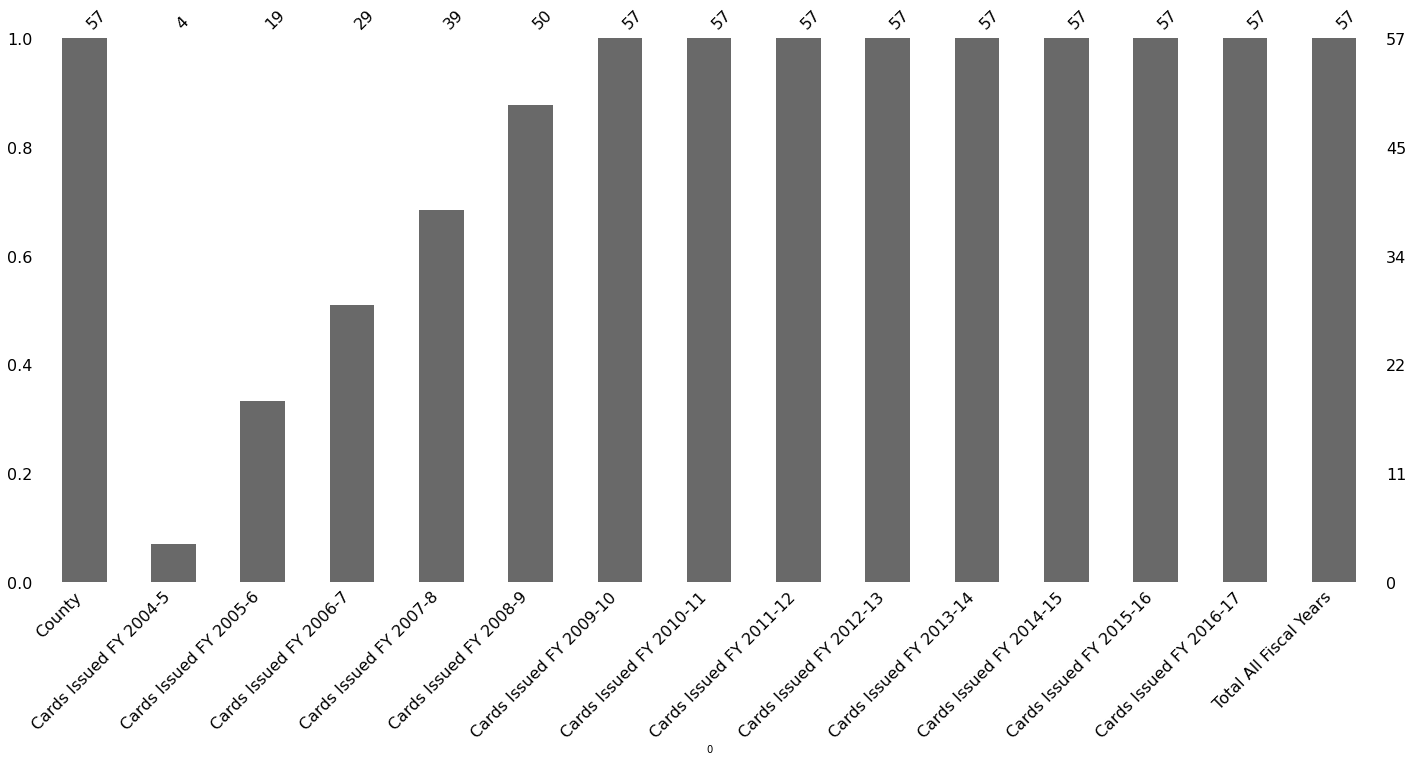

In [8]:
#Tip: if you want to suppress the Matplotlib output, just add a semicolon ; to your last line of code!
mnso.bar(df);

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1 to 57
Data columns (total 15 columns):
County                     57 non-null object
Cards Issued FY 2004-5     4 non-null object
Cards Issued FY 2005-6     19 non-null object
Cards Issued FY 2006-7     29 non-null object
Cards Issued FY 2007-8     39 non-null object
Cards Issued FY 2008-9     50 non-null object
Cards Issued FY 2009-10    57 non-null object
Cards Issued FY 2010-11    57 non-null object
Cards Issued FY 2011-12    57 non-null object
Cards Issued FY 2012-13    57 non-null object
Cards Issued FY 2013-14    57 non-null object
Cards Issued FY 2014-15    57 non-null object
Cards Issued FY 2015-16    57 non-null object
Cards Issued FY 2016-17    57 non-null object
 Total All Fiscal Years    57 non-null object
dtypes: object(15)
memory usage: 7.1+ KB


In [9]:
df.describe()

,County,Cards Issued FY 2004-5,Cards Issued FY 2005-6,Cards Issued FY 2006-7,Cards Issued FY 2007-8,Cards Issued FY 2008-9,Cards Issued FY 2009-10,Cards Issued FY 2010-11,Cards Issued FY 2011-12,Cards Issued FY 2012-13,Cards Issued FY 2013-14,Cards Issued FY 2014-15,Cards Issued FY 2015-16,Cards Issued FY 2016-17,Total All Fiscal Years
count,57,4,19,29,39,50,57,57,57,57,57,57,57,57,57
unique,57,4,18,26,33,41,54,50,45,44,43,49,44,35,57
top,Glenn,14,6,4,1,0,0,0,0,0,0,19,0,0,42
freq,1,1,2,3,3,3,2,2,5,5,4,3,5,7,1


In [10]:
df.isnull().sum()

0
County                      0
Cards Issued FY 2004-5     53
Cards Issued FY 2005-6     38
Cards Issued FY 2006-7     28
Cards Issued FY 2007-8     18
Cards Issued FY 2008-9      7
Cards Issued FY 2009-10     0
Cards Issued FY 2010-11     0
Cards Issued FY 2011-12     0
Cards Issued FY 2012-13     0
Cards Issued FY 2013-14     0
Cards Issued FY 2014-15     0
Cards Issued FY 2015-16     0
Cards Issued FY 2016-17     0
 Total All Fiscal Years     0
dtype: int64

In [11]:
df.drop(df.columns[[1,2,3,4]], axis=1, inplace=True)

In [12]:
# remove null values
df2 = df.dropna()
df2

,County,Cards Issued FY 2008-9,Cards Issued FY 2009-10,Cards Issued FY 2010-11,Cards Issued FY 2011-12,Cards Issued FY 2012-13,Cards Issued FY 2013-14,Cards Issued FY 2014-15,Cards Issued FY 2015-16,Cards Issued FY 2016-17,Total All Fiscal Years
1,Alameda,652,611,439,279,242,216,242,214,62,5089
2,Alpine,0,2,0,0,0,0,0,0,0,2
3,Amador,16,16,6,3,2,3,10,13,4,147
4,Butte,33,48,33,23,21,18,16,18,4,235
5,Calaveras,46,94,71,49,45,44,42,69,13,529
6,Contra Costa,162,262,239,182,130,140,145,149,45,1764
7,Del Norte,47,45,40,23,12,24,37,10,9,469
8,El Dorado,28,73,59,30,30,37,89,22,19,403
9,Fresno,143,182,159,142,107,155,156,151,47,1242
10,Glenn,3,4,37,0,0,0,0,3,0,51


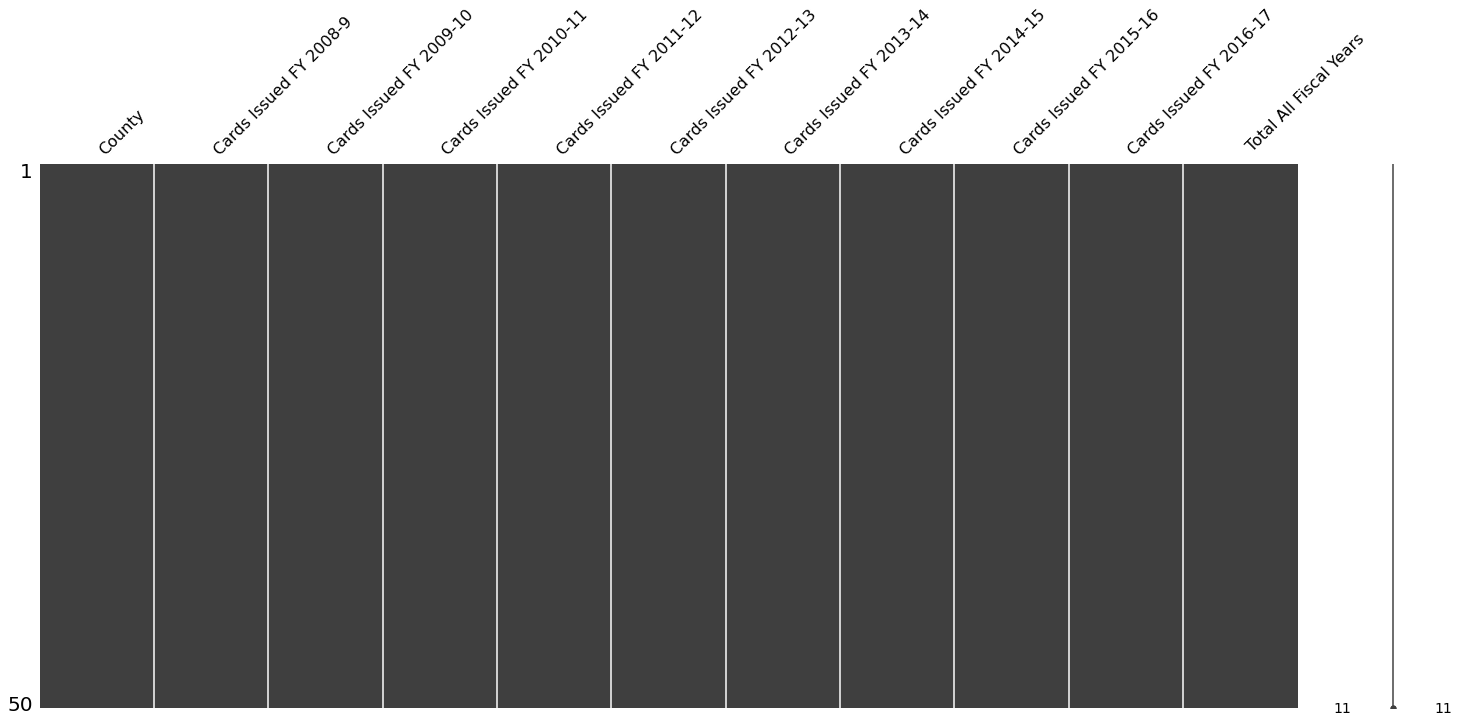

In [14]:
# confirming there are no more null values
mnso.matrix(df2);

In [24]:
df3 = df2.drop([57])

In [67]:
df3.columns = ['County', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016','Total' ]

In [79]:
# final clean dataset
df4 = df3.sort_values(df2.columns[10], ascending=False).reset_index(drop=True)
df4

,County,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Total
0,San Francisco,3118,2817,2173,1638,1008,860,670,652,169,22214
1,Los Angeles,667,1165,1065,1083,998,987,873,1153,353,8745
2,Riverside,680,911,810,733,622,763,782,929,407,7736
3,Marin,824,885,635,372,267,225,200,245,76,6081
4,Alameda,652,611,439,279,242,216,242,214,62,5089
5,San Mateo,398,347,308,227,206,203,159,168,65,3367
6,Orange,269,558,461,353,257,262,303,392,113,3082
7,Mendocino,292,280,171,111,69,74,38,25,12,2864
8,Humboldt,370,436,326,228,173,111,79,102,34,2562
9,Sonoma,222,337,224,162,132,138,123,115,27,2311


# Visualize Total Issued Cards 

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [81]:
df4 = df2.drop(columns = ['Total'])

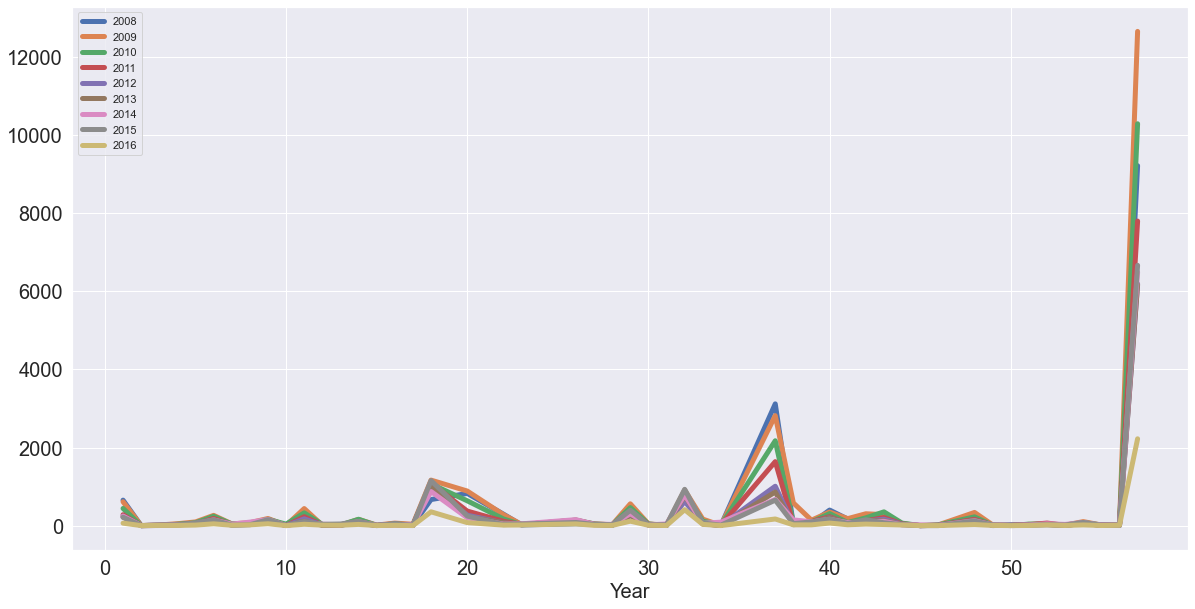

In [82]:
df4.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

# Create SQLITE DB

In [74]:
import sqlite3
conn = sqlite3.connect('cards.db')
print("Opened Succesfully")
c = conn.cursor()

Opened Succesfully


In [75]:
# Create Table
conn.execute('''CREATE TABLE issued_medical_cards (County TEXT PRIMARY KEY NOT NULL, Year_2008 INTEGER, Year_2009 INTEGER, Year_2010 INTEGER, Year_2011 INTEGER, Year_2012 INTEGER, Year_2013 INTEGER, Year_2014 INTEGER, Year_2015 INTEGER, Year_2016 INTEGER );''')

In [77]:
df4.head()

,County,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Alameda,652,611,439,279,242,216,242,214,62
2,Alpine,0,2,0,0,0,0,0,0,0
3,Amador,16,16,6,3,2,3,10,13,4
4,Butte,33,48,33,23,21,18,16,18,4
5,Calaveras,46,94,71,49,45,44,42,69,13


In [76]:
# Add dataframe to db
df4.to_sql('issued_medical_cards',con=conn,if_exists='append',index=False)

OperationalError: table issued_medical_cards has no column named 2008

In [49]:
# Spot Check
pd.read_sql("Select * from issued_medical_cards limit 10",conn)

,Country,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
